In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl 
import math
import scipy
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy.stats.stats import pearsonr

import sys
sys.path.append("../")

%matplotlib inline
%load_ext autoreload
%autoreload 2

In [3]:
from sklearn.datasets import load_boston
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score

boston = load_boston()
dataset = pd.DataFrame(boston.data, columns=boston.feature_names)
dataset['target'] = boston.target
dataset

observations = len(dataset)
variables = dataset.columns[:-1]
X = dataset.iloc[:, :-1]
y = dataset['target'].values

In [4]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [5]:
linear_regression = linear_model.LinearRegression(normalize=False, fit_intercept=True)
linear_regression

LinearRegression()

In [6]:
create_cubic = PolynomialFeatures(degree=3, interaction_only=False, include_bias=False)
create_cubic

PolynomialFeatures(degree=3, include_bias=False)

In [7]:
create_quadratic = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)
create_quadratic

PolynomialFeatures(include_bias=False)

In [31]:
linear_predictor = make_pipeline(linear_regression)
quadratic_predictor = make_pipeline(create_quadratic, linear_regression)
cubic_predictor = make_pipeline(create_cubic, linear_regression)

In [23]:
predictor = 'LSTAT'

In [24]:
x = dataset[predictor].values.reshape((observations, 1))

In [22]:
xt = np.arange(0, 50, 0.1).reshape((500, 1))

In [26]:
x_range = [dataset[predictor].min(), dataset[predictor].max()]
x_range

[1.73, 37.97]

In [27]:
y_range = [dataset['target'].min(), dataset['target'].max()]

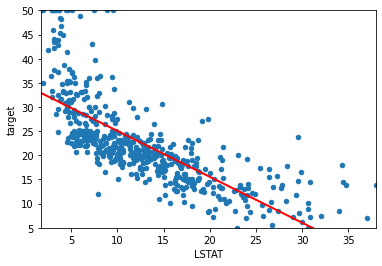

In [32]:
scatter = dataset.plot(kind='scatter', x=predictor, y='target', xlim=x_range, ylim=y_range)
regr_ine = scatter.plot(xt, linear_predictor.fit(x, y).predict(xt), '-', color='red', linewidth=2)

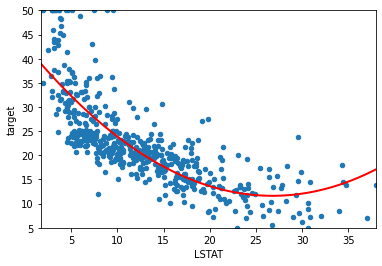

In [33]:
scatter = dataset.plot(kind='scatter', x=predictor, y='target', xlim=x_range, ylim=y_range)
regr_ine = scatter.plot(xt, quadratic_predictor.fit(x, y).predict(xt), '-', color='red', linewidth=2)

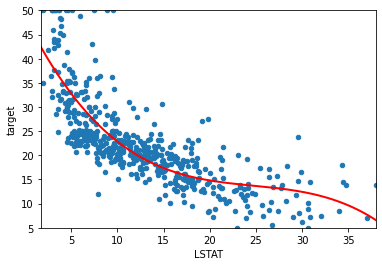

In [34]:
scatter = dataset.plot(kind='scatter', x=predictor, y='target', xlim=x_range, ylim=y_range)
regr_ine = scatter.plot(xt, cubic_predictor.fit(x, y).predict(xt), '-', color='red', linewidth=2)

In [37]:
for d in range(1, 15):
    create_poly = PolynomialFeatures(degree=d, interaction_only=False, include_bias=False)
    poly = make_pipeline(create_poly, StandardScaler(), linear_regression)
    model = poly.fit(x ,y)
    print("R2 degress - %2i polynomial: %0.3f" % (d, r2_score(y, model.predict(x))))

R2 degress -  1 polynomial: 0.544
R2 degress -  2 polynomial: 0.641
R2 degress -  3 polynomial: 0.658
R2 degress -  4 polynomial: 0.673
R2 degress -  5 polynomial: 0.682
R2 degress -  6 polynomial: 0.683
R2 degress -  7 polynomial: 0.683
R2 degress -  8 polynomial: 0.684
R2 degress -  9 polynomial: 0.685
R2 degress - 10 polynomial: 0.687
R2 degress - 11 polynomial: 0.689
R2 degress - 12 polynomial: 0.689
R2 degress - 13 polynomial: 0.690
R2 degress - 14 polynomial: 0.693


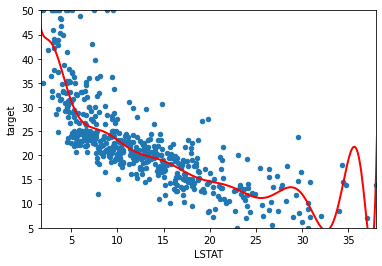

In [38]:
scatter = dataset.plot(kind='scatter', x=predictor, y='target', xlim=x_range, ylim=y_range)
regr_ine = scatter.plot(xt, model.predict(xt), '-', color='red', linewidth=2)